# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Boston Housing dataset - again! 

The dataset is available in the file `'boston.csv'`. 

- Import the dataset and print its `.head()` and dimensions: 

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset 
data = pd.read_csv('boston.csv') 

# Print the first five rows 
data.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Print the dimensions of data
print(data.shape)

## Identify features and target data 

In this lab, we will use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`: 

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor) 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood 

#### Target
- `MEDV`',the median value of the home 

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents for validity 

In [9]:
# Features and target data
target = data['medv']
features = data[['rm','lstat','ptratio']]


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

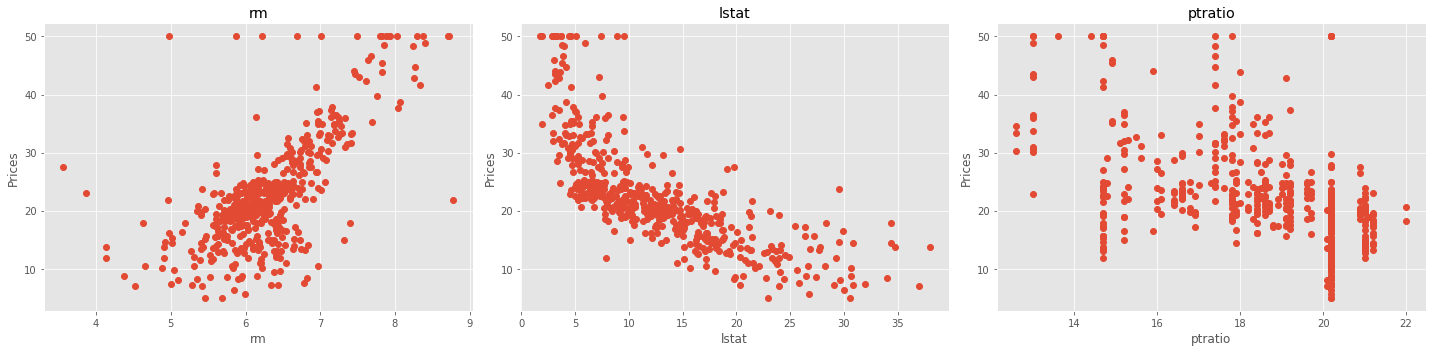

In [10]:
# Your code here 

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], target, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal-sized arrays for the given true and predicted values 

In [12]:
# Import metrics
from sklearn.metrics import r2_score,mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    print('R2 Score: ', score)
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true,y_predict)
    print('MSE: ', mse)
    # Return the score


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

R2 Score:  0.9228556485355649
MSE:  0.4719999999999998


## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [14]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [15]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)

# [0.47097115950374013, 38.795686274509805]  - R2, MSE

R2 Score:  0.47097115950374013
MSE:  38.795686274509805


## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

In [18]:
# Your code here 

for i in range(1,31):
    print('Tree Depth: ',i)
    # Instantiate DecisionTreeRegressor 
    regressor = DecisionTreeRegressor(max_depth = i, random_state=45)

    # Fit the model to training data
    regressor.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(x_test)

    # Calculate performance using the performance() function 
    score = performance(y_test, y_pred)
    print("========================")

Tree Depth:  1
R2 Score:  0.3602156982888397
MSE:  46.91780325106487
Tree Depth:  2
R2 Score:  0.645549571073612
MSE:  25.9931908959712
Tree Depth:  3
R2 Score:  0.6679219352208099
MSE:  24.35254079481681
Tree Depth:  4
R2 Score:  0.7226546855127474
MSE:  20.338781153139767
Tree Depth:  5
R2 Score:  0.746527856459061
MSE:  18.588071211613478
Tree Depth:  6
R2 Score:  0.7515894043185498
MSE:  18.216888758430127
Tree Depth:  7
R2 Score:  0.6263488910856303
MSE:  27.401249398740603
Tree Depth:  8
R2 Score:  0.6555843678227183
MSE:  25.257301287114323
Tree Depth:  9
R2 Score:  0.6240595926464088
MSE:  27.56913231407174
Tree Depth:  10
R2 Score:  0.6113026664935214
MSE:  28.50464597035984
Tree Depth:  11
R2 Score:  0.6134488068311303
MSE:  28.347261380210004
Tree Depth:  12
R2 Score:  0.6098721144721015
MSE:  28.609553762098198
Tree Depth:  13
R2 Score:  0.49127115931037457
MSE:  37.307010490535475
Tree Depth:  14
R2 Score:  0.48288911786867383
MSE:  37.921697300062
Tree Depth:  15
R2 Score

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

In [19]:
# Your code here 

for i in range(2,11):
    print('Min Sample Splits: ',i)
    # Instantiate DecisionTreeRegressor 
    regressor = DecisionTreeRegressor(min_samples_split = i, random_state=45)

    # Fit the model to training data
    regressor.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(x_test)

    # Calculate performance using the performance() function 
    score = performance(y_test, y_pred)
    print("========================")

Min Sample Splits:  2
R2 Score:  0.47097115950374013
MSE:  38.795686274509805
Min Sample Splits:  3
R2 Score:  0.4803952327124762
MSE:  38.104583333333345
Min Sample Splits:  4
R2 Score:  0.5247289625517133
MSE:  34.85342320261439
Min Sample Splits:  5
R2 Score:  0.6473458760458828
MSE:  25.86146105664488
Min Sample Splits:  6
R2 Score:  0.6439721500825788
MSE:  26.108869144880178
Min Sample Splits:  7
R2 Score:  0.6449886749672344
MSE:  26.03432352941177
Min Sample Splits:  8
R2 Score:  0.6403227207405336
MSE:  26.37649560490863
Min Sample Splits:  9
R2 Score:  0.64204832172797
MSE:  26.24995075627473
Min Sample Splits:  10
R2 Score:  0.5191660060438964
MSE:  35.26137584888894


# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [21]:
# Your code here 
regressor = DecisionTreeRegressor(min_samples_split = 5, max_depth = 6, random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)


R2 Score:  0.7515894043185498
MSE:  18.216888758430127


## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like max-features to find a more optimal version of the model 

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Boston Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 